___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (15,9)
import warnings
warnings.filterwarnings('ignore')

#  Ingest the data to notebook 

In [1]:
df = pd.read_csv("heart.csv")

<IPython.core.display.Javascript object>

# EDA

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum().sum()

0

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

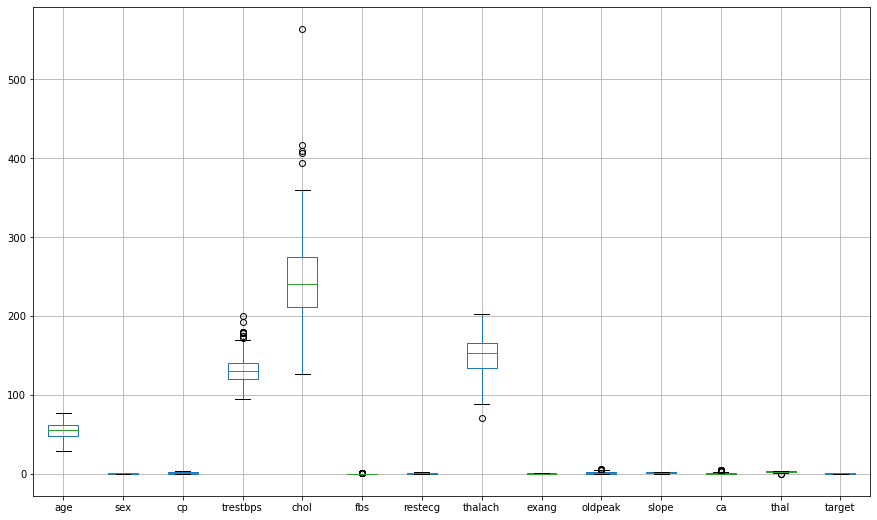

In [77]:
df.boxplot()

<AxesSubplot:>

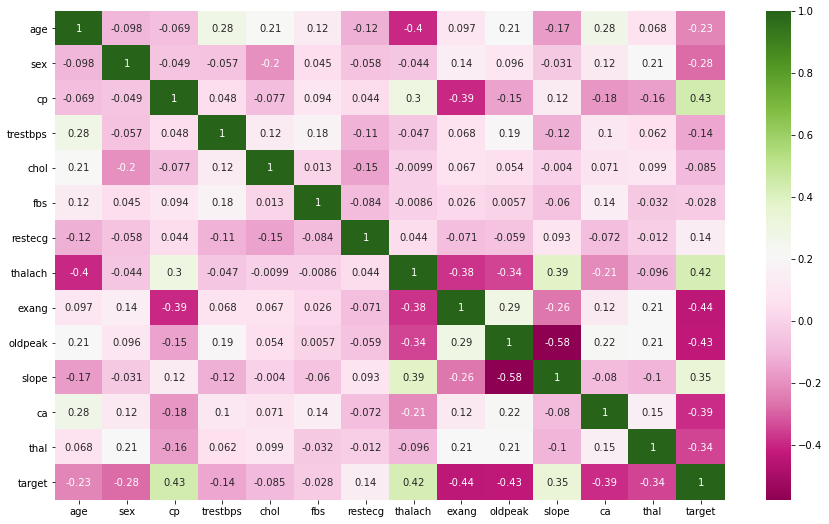

In [12]:
sns.heatmap(df.corr(), annot = True,cmap="PiYG")

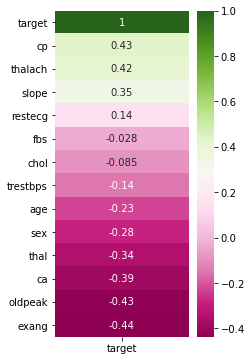

In [80]:
plt.figure(figsize=(3,6))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), 
            vmax = 1,
            annot=True, 
            cmap="PiYG")
plt.show()

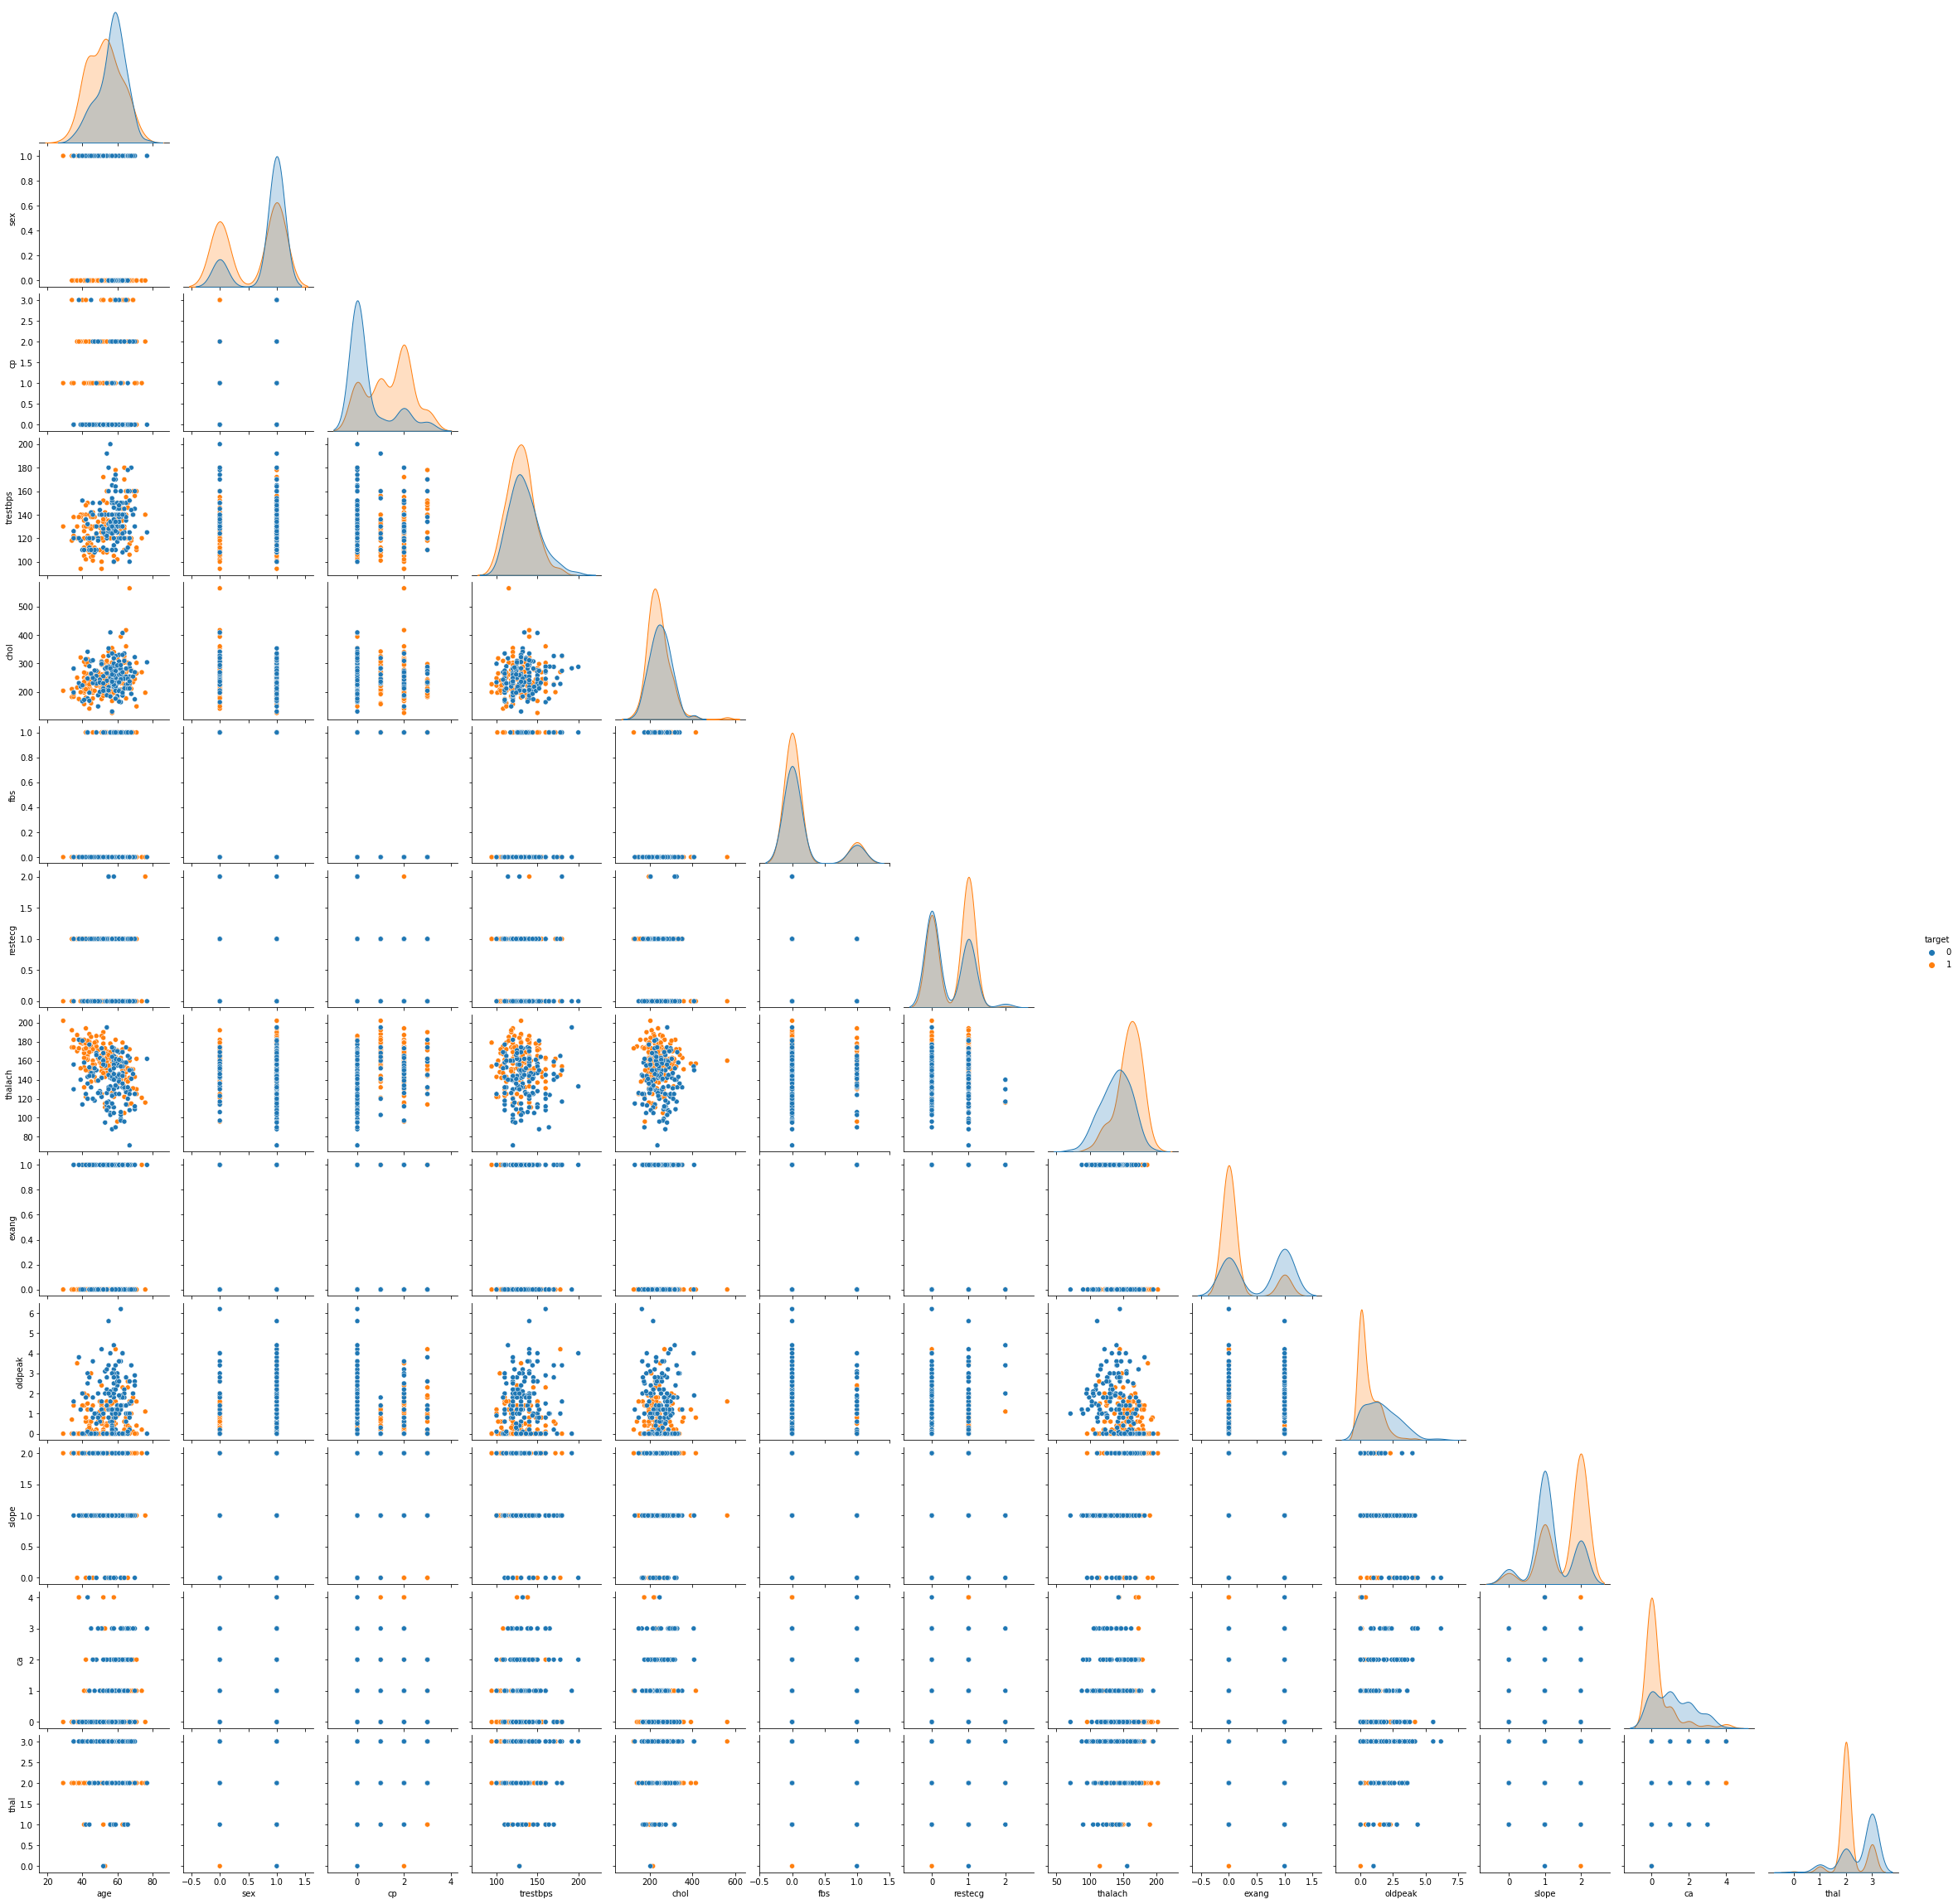

In [70]:
# sns.pairplot(df,hue='target',corner=True);

In [36]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

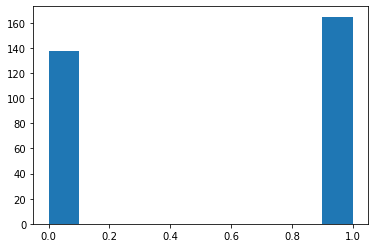

In [35]:
plt.figure(figsize=(6,4))
plt.hist(df["target"])
plt.show()

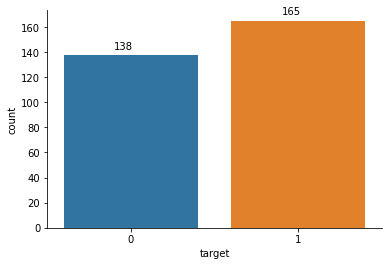

In [33]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

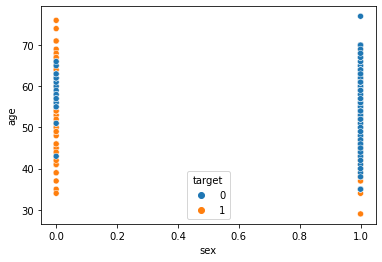

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(y='age', x='sex', data=df, hue='target');

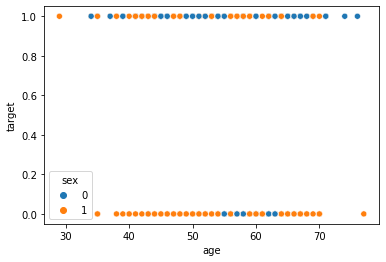

In [83]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age',y='target',data=df,hue='sex');

# Data Preprocessing

In [84]:
X = df.drop('target',axis=1)
y = df['target']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [87]:
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Implement Logistic Regression and Evaluate

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
log_model = LogisticRegression()

In [92]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [93]:
log_model.coef_

array([[-0.08725068, -0.6417029 ,  0.89809385, -0.31557464, -0.24248918,
         0.09299338,  0.18864842,  0.3933351 , -0.47994438, -0.47415917,
         0.42376881, -0.82516775, -0.5581558 ]])

In [94]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [106]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99459645, 0.00540355],
       [0.15522764, 0.84477236],
       [0.25693359, 0.74306641],
       [0.02374954, 0.97625046],
       [0.98174361, 0.01825639],
       [0.11081562, 0.88918438],
       [0.05751249, 0.94248751],
       [0.98592779, 0.01407221],
       [0.960748  , 0.039252  ],
       [0.16562719, 0.83437281],
       [0.97003167, 0.02996833],
       [0.23679849, 0.76320151],
       [0.94991998, 0.05008002],
       [0.59713932, 0.40286068],
       [0.07603945, 0.92396055],
       [0.18632361, 0.81367639],
       [0.01292489, 0.98707511],
       [0.24909519, 0.75090481],
       [0.15253405, 0.84746595],
       [0.99074853, 0.00925147],
       [0.99107583, 0.00892417],
       [0.32351429, 0.67648571],
       [0.32238315, 0.67761685],
       [0.28572102, 0.71427898],
       [0.58211298, 0.41788702],
       [0.03292785, 0.96707215],
       [0.98029134, 0.01970866],
       [0.21517323, 0.78482677],
       [0.97039574, 0.02960426],
       [0.94742646, 0.05257354],
       [0.

In [96]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0


In [97]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0,0.005404
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0.844772
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0.743066
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.976250
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.018256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0,0.064331
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,0.995113
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0,0.008848
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0,0.057095


In [98]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0,0.005404,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0.844772,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,0.743066,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,0.976250,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.018256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0,0.064331,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,0.995113,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0,0.008848,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0,0.057095,0


In [99]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [100]:
accuracy_score(y_test,y_pred)  #test_size=0.1 0.83

0.8360655737704918

In [101]:
log_model.score(X_test_scaled, y_test) #test_size=0.1 0.83

0.8360655737704918

In [102]:
precision_score(y_test, y_pred) #test_size=0.1 0.82

0.7777777777777778

In [103]:
recall_score(y_test, y_pred)  #test_size=0.1 0.87

0.9333333333333333

In [104]:
f1_score(y_test,y_pred) #test_size=0.1 0.84

0.8484848484848485

# Implement KNN and Evaluate

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 